In [ ]:
import time
import os
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.python.keras.callbacks import TensorBoard
from helper import *
from plot_keras_history import show_history, plot_history
# https://pypi.org/project/plot-keras-history/
# pip install plot-keras-history



Get Data fro classification problem

Binary Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 3000
X,y = make_circles(n_samples,noise=0.03,random_state = 42)

In [3]:
circles = pd.DataFrame({
    'X0':X[:,0],
    'X1':X[:,1],
    'Lables': y
})

In [4]:
circles

,X0,X1,Lables
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


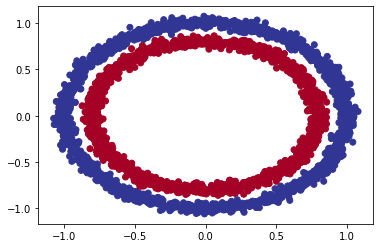

In [5]:
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu_r)

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model1.fit(X,y,epochs = 10)


Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 3.9255 - accuracy: 0.4673
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.4970
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4913
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4777
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4767
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4957
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4753
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4670
Epoch 10/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4957


Adding an extra layer to the model

In [7]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X, y, epochs=200, verbose = 0)

model2.evaluate(X,y)


94/94 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.693419337272644, 0.5]

Adding more hidden neurons and an extra layer

In [8]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(), # Changing the optimizer
               metrics=['accuracy'])

model3.fit(X, y, epochs=100, verbose=0)

model3.evaluate(X, y)


94/94 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000


[0.6947672367095947, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing multicalss classification


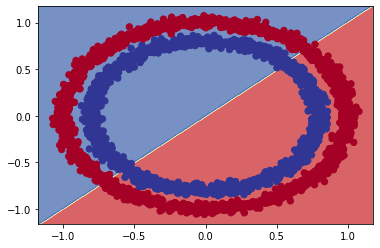

In [9]:
from helper import plot_decision_boundary

plot_decision_boundary(model3,X = X,y = y)

Use the model for a regression problem

In [10]:
# Build a dataset for regression
# tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = X +100

#Split data to train test split
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:] 

model3.fit(tf.expand_dims(X_reg_train, axis = -1),y_reg_train, epochs = 100, verbose =0)


Replicate the model for regression problem

In [11]:

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae, # Altering the loss function
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=['mae'])

hist = model4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100,verbose=0)
y_reg_pred = model4.predict(tf.expand_dims(X_reg_test,axis = -1))


2/2 [==============================] - 0s 11ms/step


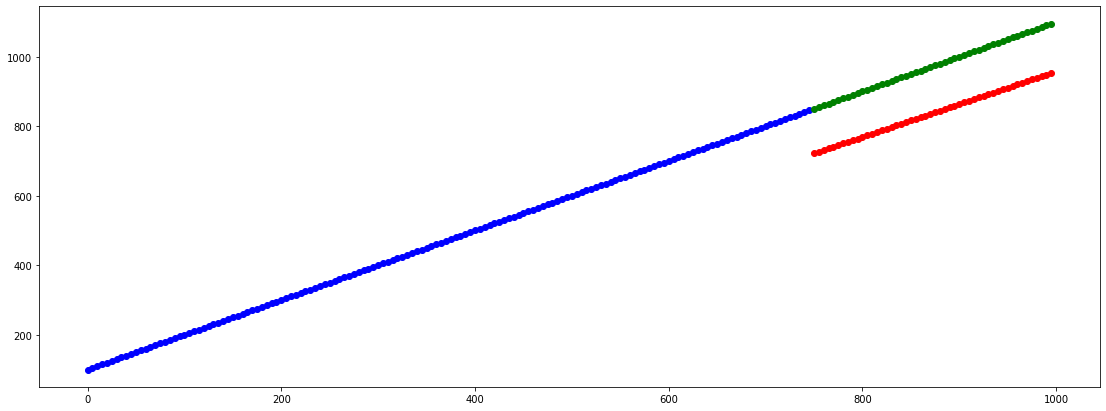

In [12]:

plt.figure(figsize=(19,7))
plt.scatter(X_reg_train,y_reg_train,c = 'b', label = 'Training Data')
plt.scatter(X_reg_test,y_reg_test,c = 'g', label = 'Testing Data')
plt.scatter(X_reg_test,y_reg_pred,c = 'r', label = 'Predictions')


Introducing Non Linearity In Our Model

In [13]:
# NAME = f'Non-Linaerity-Model {int(time.time())}'
# tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy']
            )

history = model5.fit(X,y,epochs =100,validation_split=0.33, verbose = 0)

313/313 [==============================] - 0s 1ms/step
Binary Classification


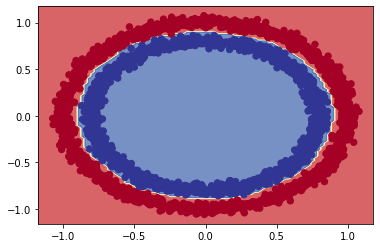

In [14]:
plot_decision_boundary(model5,X,y)

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

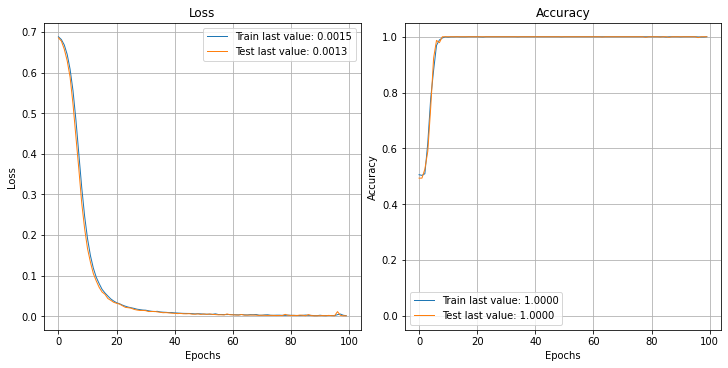

In [15]:
plot_history(history)

Making Sense Of Activation Functions: 
Sigmoid

In [16]:
# Create a linear valued graph
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

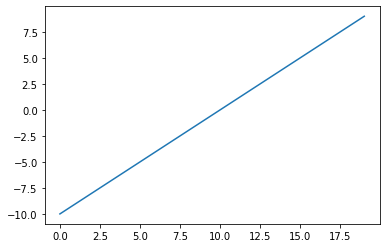

In [17]:
plt.plot(A)

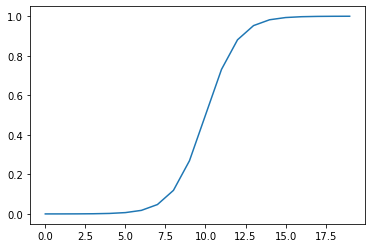

In [18]:
# Using the sigmoid function formula ie sigmoid(x) = 1/(1 + exp(-x))
B = 1/ (1 + tf.exp(-A))
plt.plot(B)

Rectified Linear unit (ReLU)

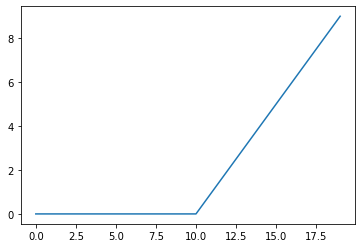

In [19]:
# Relu : max(0,x)

C = tf.math.maximum(0,A)
plt.plot(C)

Improving classification model by creating training and test splits

In [20]:
X_train, y_train = X[:2400], y[:2400]
X_test, y_test = X[2400:], y[2400:]


Recreate the model: Training on train data and evaluating on testing data

In [21]:
# Use tensorboard --logdir=./ in terminal to run ternsorboard
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['accuracy']
            )

history6 = model6.fit(X_train,y_train,epochs =25,validation_split=0.33, verbose = 0)

In [22]:
model6.evaluate(X_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000


[0.008709101006388664, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification


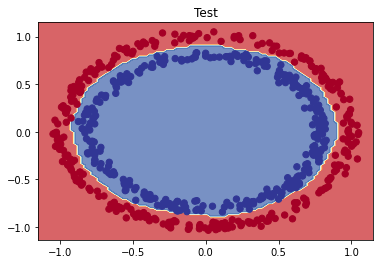

In [23]:
# plt.figure(figsize = (12,7))
# plt.subplot(1,2,1)

# plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model6,X =X_test,y =y_test)

313/313 [==============================] - 1s 2ms/step
Binary Classification


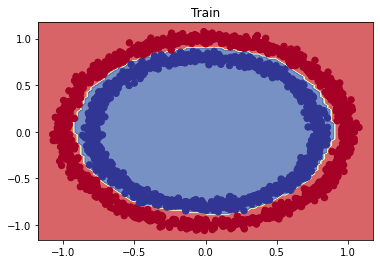

In [24]:
plt.title('Train')
plot_decision_boundary(model6, X = X_train,y =y_train)

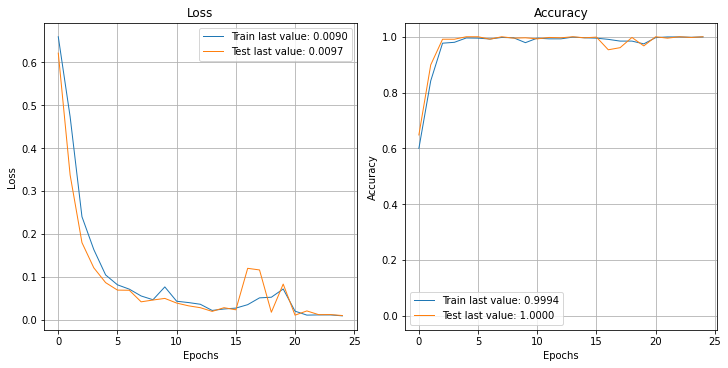

In [25]:
show_history(history6)


Introducing callbacks

In [26]:
tensorboard = save_in_tensorboard('Adding callback to model')
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model7.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model7.fit(X_train,
                     y_train,
                     epochs = 100,
                    #  callbacks = [lr_scheduler,tensorboard],
                     callbacks = [lr_scheduler],
                     verbose = 0)

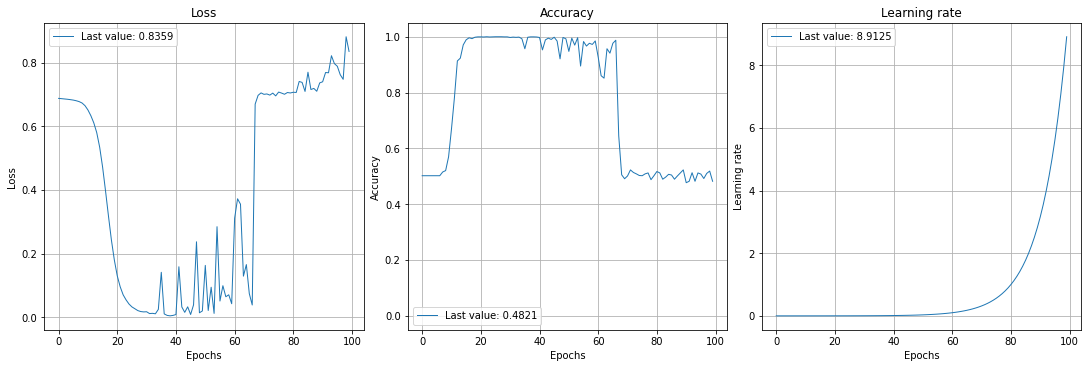

In [27]:
show_history(history)

Text(0.5, 1.0, 'Learnig Rate Vs Loss')

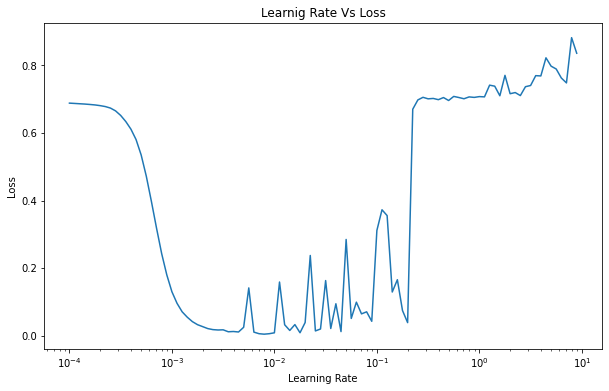

In [28]:
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,6))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learnig Rate Vs Loss')

313/313 [==============================] - 0s 1ms/step
Binary Classification


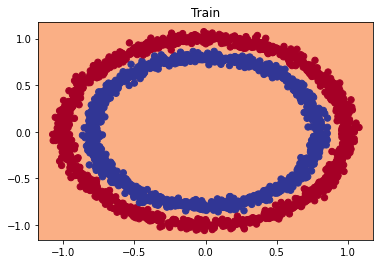

In [29]:
plt.title('Train')
plot_decision_boundary(model7, X=X_train, y=y_train)



313/313 [==============================] - 0s 1ms/step
Binary Classification


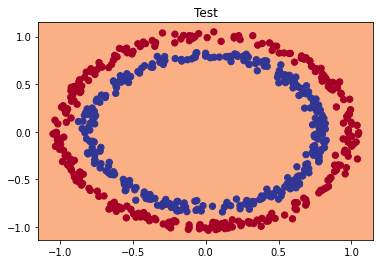

In [30]:
plt.title('Test')
plot_decision_boundary(model7, X=X_test, y=y_test)


In [31]:
# Creating confusion_matrix for the best performing model ie model6
from sklearn.metrics import confusion_matrix

y_preds = model6.predict(X_test)

# Convert the prediction probabilities into binary format
y_preds = tf.round(y_preds)

confusion_matrix(y_test,y_preds)

19/19 [==============================] - 0s 1ms/step


array([[295,   0],
       [  0, 305]], dtype=int64)

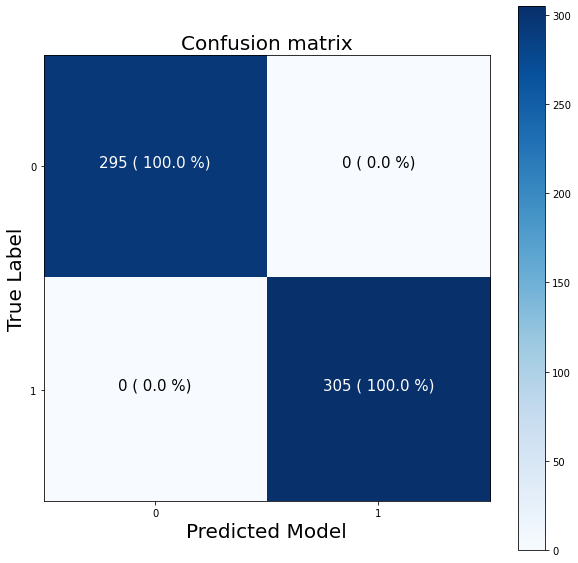

In [32]:
plot_confusion_matrix(y_test,y_preds)

In [33]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [34]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']


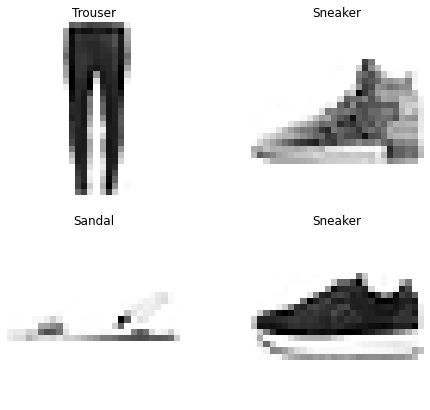

In [37]:
import random 
plt.figure(figsize = (8,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [41]:


tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    # Adding a flatter layer and specifying the input shape
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )

history8 = model8.fit(
    train_data,
    tf.one_hot(train_labels, depth = 10),
    epochs = 10,
    validation_data = (test_data, tf.one_hot(test_labels, depth = 10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 - val_accuracy: